<a href="https://colab.research.google.com/github/Vcetpreeti/DS_internship/blob/main/bank_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("bank_transactions.csv")
df.head(500)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.5
...,...,...,...,...,...,...,...,...,...
495,T496,C2637556,16/7/70,F,ON KALYAN ROAD NAVI MUMBAI,98203.35,21/10/16,213531.0,250.0
496,T497,C4925560,15/2/80,M,MOHALI,18.38,21/10/16,213533.0,184.0
497,T498,C4214976,18/10/87,M,AHMEDABAD,11778.81,21/10/16,214104.0,200.0
498,T499,C5265862,20/6/91,M,NOIDA,7811.65,21/10/16,201327.0,459.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148679 entries, 0 to 148678
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            148679 non-null  object 
 1   CustomerID               148678 non-null  object 
 2   CustomerDOB              148182 non-null  object 
 3   CustGender               148529 non-null  object 
 4   CustLocation             148652 non-null  object 
 5   CustAccountBalance       148282 non-null  float64
 6   TransactionDate          148678 non-null  object 
 7   TransactionTime          148678 non-null  float64
 8   TransactionAmount (INR)  148678 non-null  float64
dtypes: float64(3), object(6)
memory usage: 10.2+ MB


In [3]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime            float64
TransactionAmount (INR)    float64
dtype: object

In [4]:
df.isnull().sum()

TransactionID                0
CustomerID                   1
CustomerDOB                497
CustGender                 150
CustLocation                27
CustAccountBalance         397
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      1
dtype: int64

In [5]:
df["TransactionAmount (INR)"]=df["TransactionAmount (INR)"].fillna(df["TransactionAmount (INR)"].mean())
df["CustAccountBalance"]=df["CustAccountBalance"].fillna(df["CustAccountBalance"].mean())

In [6]:
df.isnull().sum()

TransactionID                0
CustomerID                   1
CustomerDOB                497
CustGender                 150
CustLocation                27
CustAccountBalance           0
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      0
dtype: int64

CustLocation
MUMBAI       14845
NEW DELHI    11975
BANGALORE    11912
GURGAON      10579
DELHI        10133
NOIDA         4597
CHENNAI       4253
PUNE          3540
HYDERABAD     3311
THANE         3135
Name: count, dtype: int64


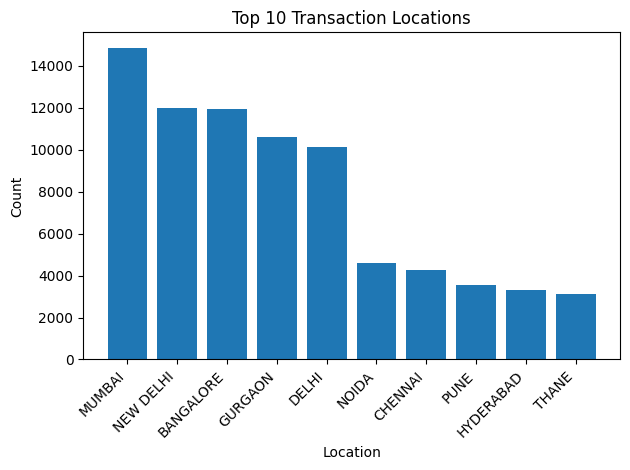

In [7]:
top_10_locations = df['CustLocation'].value_counts().nlargest(10)
print(top_10_locations)
plt.bar(top_10_locations.index, top_10_locations.values)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Transaction Locations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

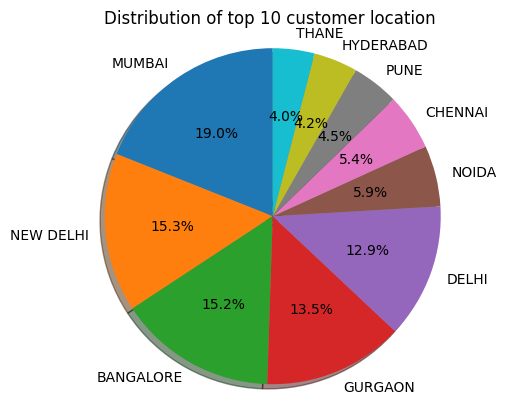

In [8]:
# Group the data by 'Transaction Type' and count the occurrences
transaction_counts = df['CustLocation'].value_counts().nlargest(10)

# Plot the pie chart
plt.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Distribution of top 10 customer location ')
plt.show()

In [9]:
df['CustGender'] = df['CustGender'].fillna(df['CustGender'].mode()[0])

In [12]:
df.isna().sum()

TransactionID                0
CustomerID                   1
CustomerDOB                497
CustGender                   0
CustLocation                27
CustAccountBalance           0
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      0
dtype: int64

In [11]:
print(df['TransactionAmount (INR)'])
Q1 = df['TransactionAmount (INR)'].quantile(0.25)
Q3 = df['TransactionAmount (INR)'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['TransactionAmount (INR)'] < lower].values
out2=df[df['TransactionAmount (INR)'] > upper].values

df['TransactionAmount (INR)'].replace(out1,lower,inplace=True)
df['TransactionAmount (INR)'].replace(out2,upper,inplace=True)

print(df['TransactionAmount (INR)'])

0            25.000000
1         27999.000000
2           459.000000
3          2060.000000
4          1762.500000
              ...     
148674      150.000000
148675     2703.000000
148676     4000.000000
148677      140.000000
148678     1603.452061
Name: TransactionAmount (INR), Length: 148679, dtype: float64
1038.95
2758.425
-1397.3750000000002
0            25.000000
1         27999.000000
2           459.000000
3          2060.000000
4          1762.500000
              ...     
148674      150.000000
148675     2703.000000
148676     4000.000000
148677      140.000000
148678     1603.452061
Name: TransactionAmount (INR), Length: 148679, dtype: float64


In [12]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

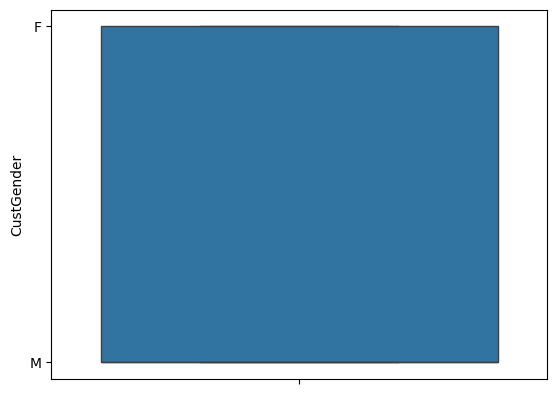

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['CustGender'])
plt.show()

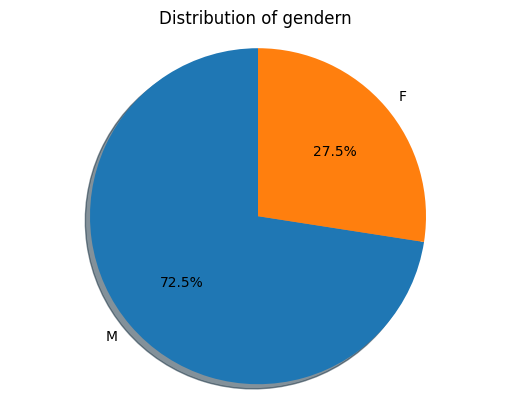

In [14]:
# Group the data by 'Transaction Type' and count the occurrences
transaction_counts = df['CustGender'].value_counts().nlargest(10)

# Plot the pie chart
plt.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Distribution of gendern ')
plt.show()

In [15]:
# Convert 'CustomerDOB' to datetime objects if it's not already
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Extract numerical features from the date
df['CustomerDOByear'] = df['CustomerDOB'].dt.year
# You can similarly extract month, day, etc. if needed

# Now perform quantile calculations on the numerical 'CustomerAge' column
print(df['CustomerDOByear'])
Q1 = df['CustomerDOByear'].quantile(0.25)
Q3 = df['CustomerDOByear'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

# Continue with your outlier detection and replacement logic using 'CustomerAge'

<ipython-input-15-0cf643b6c9e8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


0         1994.0
1         2057.0
2         1996.0
3         2073.0
4         1988.0
           ...  
148674    1980.0
148675    1985.0
148676    1975.0
148677    1984.0
148678       NaN
Name: CustomerDOByear, Length: 148679, dtype: float64
9.0
2005.5
1969.5


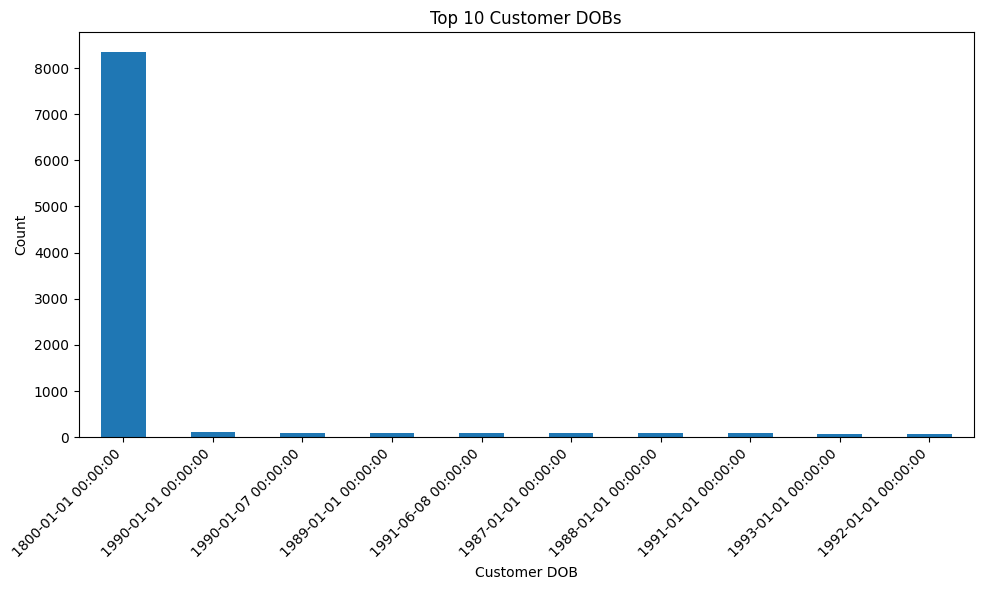

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'CustomerDOB' is a datetime column
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])  # Ensure it's datetime

# Get the top 10 most frequent DOBs
top_10_dob = df['CustomerDOB'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
top_10_dob.plot(kind='bar')
plt.xlabel('Customer DOB')
plt.ylabel('Count')
plt.title('Top 10 Customer DOBs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [17]:
df.isnull().sum()

TransactionID                0
CustomerID                   1
CustomerDOB                497
CustGender                   0
CustLocation                27
CustAccountBalance           0
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      0
CustomerDOByear            497
dtype: int64

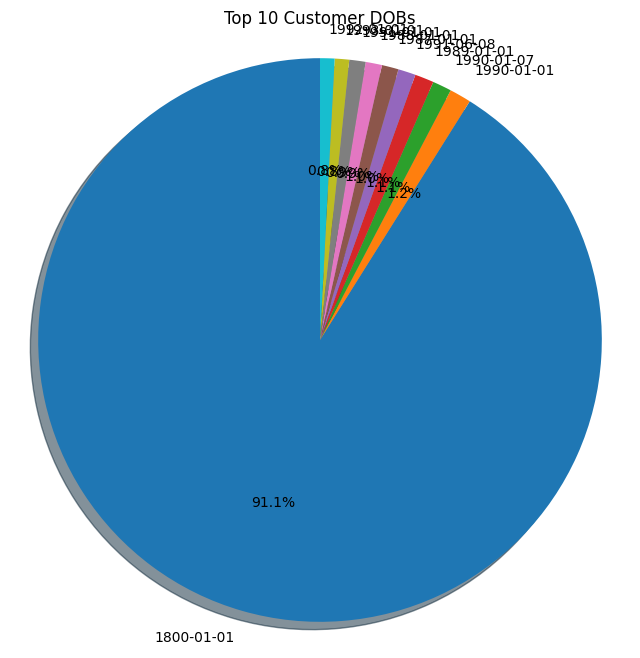

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'CustomerDOB' is a datetime column
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Get the top 10 most frequent DOBs
top_10_dob = df['CustomerDOB'].value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(top_10_dob, labels=top_10_dob.index.strftime('%Y-%m-%d'),
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 10 Customer DOBs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


 # Fit and transform the 'color' column
df['bank_transactions'] = le.fit_transform(df['CustAccountBalance'])
print(df)

       TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0                 T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1                 T2   C2142763  2057-04-04          M      JHAJJAR   
2                 T3   C4417068  1996-11-26          F       MUMBAI   
3                 T4   C5342380  2073-09-14          F       MUMBAI   
4                 T5   C9031234  1988-03-24          F  NAVI MUMBAI   
...              ...        ...         ...        ...          ...   
148674       T148675   C3516353  1980-04-12          M        NOIDA   
148675       T148676   C3234262  1985-06-06          M    NEW DELHI   
148676       T148677   C8721157  1975-04-21          M    FARIDABAD   
148677       T148678   C3349665  1984-07-14          M  NAVI MUMBAI   
148678       T148679        NaN         NaT          M          NaN   

        CustAccountBalance TransactionDate  TransactionTime  \
0             17819.050000          2/8/16         143207.0   
1              2270.6

In [20]:
import pandas as pd

# Sample DataFrame


# Get unique categories in the 'color' column
categories = df['CustLocation'].value_counts()
print(categories)  # Output: ['red' 'green' 'blue']
import pandas as pd
df_encoded = pd.get_dummies(df, columns=['CustLocation'])
print(df_encoded)


CustLocation
MUMBAI                          14845
NEW DELHI                       11975
BANGALORE                       11912
GURGAON                         10579
DELHI                           10133
                                ...  
554/4 MODERN COLLEGE RD PUNE        1
BUS DEPOT BORIVALI E MUMBAI         1
AIZWAL                              1
RING ROAD BANGALORE                 1
BRIDGE NEW DELHI                    1
Name: count, Length: 4843, dtype: int64
       TransactionID CustomerID CustomerDOB CustGender  CustAccountBalance  \
0                 T1   C5841053  1994-10-01          F        17819.050000   
1                 T2   C2142763  2057-04-04          M         2270.690000   
2                 T3   C4417068  1996-11-26          F        17874.440000   
3                 T4   C5342380  2073-09-14          F       866503.210000   
4                 T5   C9031234  1988-03-24          F         6714.430000   
...              ...        ...         ...        ...       

In [21]:
df.isna().sum()


TransactionID                0
CustomerID                   1
CustomerDOB                497
CustGender                   0
CustLocation                27
CustAccountBalance           0
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      0
CustomerDOByear            497
bank_transactions            0
dtype: int64

In [26]:
X=df[["CustAccountBalance","CustLocation"]]
Y=df[["TransactionAmount (INR)"]]

In [23]:
df["TransactionAmount (INR)"]=df["TransactionAmount (INR)"].fillna(df["TransactionAmount (INR)"].mean())


In [25]:
df.isna().sum()

TransactionID                0
CustomerID                   1
CustomerDOB                497
CustGender                   0
CustLocation                27
CustAccountBalance           0
TransactionDate              1
TransactionTime              1
TransactionAmount (INR)      0
CustomerDOByear            497
bank_transactions            0
dtype: int64

In [26]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # Use f_regression for continuous targets
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming 'df' is your original DataFrame

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'CustLocation' column to numerical labels
df['CustLocation_encoded'] = le.fit_transform(df['CustLocation'])

# Update X to use the encoded column
X = df[["CustAccountBalance", "CustLocation_encoded"]]
Y = df[["TransactionAmount (INR)"]]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_imputed = imputer.fit_transform(X)  # Apply imputation to X

# Use f_regression for feature selection with a continuous target
bestfeatures = SelectKBest(score_func=f_regression, k='all')  # Change score_func to f_regression
fit = bestfeatures.fit(X_imputed, Y.values.ravel())  # Flatten Y to a 1D array
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

                  Specs       Score
0    CustAccountBalance  438.070789
1  CustLocation_encoded    0.267427


In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assuming 'X' is your DataFrame with potential missing values

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_imputed = imputer.fit_transform(X)  # Apply imputation to X

# Now apply PCA on the imputed data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)  # Use the imputed data here

print(X_pca)

[[-9.52468590e+04 -2.74142270e+02]
 [-1.10795219e+05 -2.45006787e+02]
 [-9.51914615e+04  5.85857247e+02]
 ...
 [ 3.97982327e+05 -7.48440118e+02]
 [-1.02651100e+05  7.86922248e+02]
 [ 2.37102012e-02  2.72102778e+03]]


In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression # Use LinearRegression for continuous targets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming 'X' and 'Y' are your dataframes

# Handle missing values using SimpleImputer before splitting
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_imputed = imputer.fit_transform(X)

# Split the imputed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, random_state=0, test_size=0.3)

# Use LinearRegression for a continuous target
linreg = LinearRegression() # Changed to LinearRegression

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# Print evaluation metrics for regression
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 55949335.14251829
R-squared: 0.0019792296431657697


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming 'X' and 'Y' are your dataframes

# Encode the target variable 'Y' into categorical labels
le = LabelEncoder()
Y_encoded = le.fit_transform(Y.values.ravel())  # Flatten Y and encode

# Handle missing values in 'X' before splitting
imputer = SimpleImputer(strategy='mean') # Create an imputer object
X_imputed = imputer.fit_transform(X) # Impute missing values in X

# Split the data into train and test sets using the encoded 'Y' and imputed 'X'
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, Y_encoded, random_state=0, test_size=0.3 # Use X_imputed here
)

nb = GaussianNB()
nb.fit(X_train, y_train)  # Now 'y_train' contains categorical labels and X_train has no NaNs

y_pred1 = nb.predict(X_test)

print("Naive Bayes: ", accuracy_score(y_test, y_pred1))

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
# Encode the target variable 'Y' into categorical labels
le = LabelEncoder()
Y_encoded = le.fit_transform(Y.values.ravel())  # Flatten Y and encode

# Handle missing values in 'X' before splitting
imputer = SimpleImputer(strategy='mean') # Create an imputer object
X_imputed = imputer.fit_transform(X) # Impute missing values in X

# Split the data into train and test sets using the encoded 'Y' and imputed 'X'
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, Y_encoded, random_state=0, test_size=0.3 # Use X_imputed here
)

nb = GaussianNB()
nb.fit(X_train, y_train)  # Now 'y_train' contains categorical labels and X_train has no NaNs

y_pred1 = nb.predict(X_test)

print("Naive Bayes: ", accuracy_score(y_test, y_pred1))


# Encode the target variable 'Y' into categorical labels
le = LabelEncoder()

# Fit the encoder on the COMBINED y_train and y_test data to capture all labels
y_combined = pd.concat([y_train, y_test], axis=0)
le.fit(y_combined.values.ravel())

# Now transform y_train and y_test
y_train_encoded = le.transform(y_train.values.ravel())  # Flatten and encode y_train
y_test_encoded = le.transform(y_test.values.ravel())

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)
train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

ValueError: could not convert string to float: 'BANGALORE'